## 60.単語ベクトルの読み込みと表示
学習済み単語ベクトルをダウンロードし、"United States"の単語ベクトルを表示する

In [1]:
IS_FIRST = False

In [2]:
import gdown

if IS_FIRST:
    url = 'https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM'
    output = 'data/GoogleNews-vectors-negative300.bin.gz'
    gdown.download(url, output, quiet=False)

In [3]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format("data/GoogleNews-vectors-negative300.bin.gz", binary=True)

In [4]:
print(model['United_States'])

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 61.単語の類似度
"United States"と"U.S."のコサイン類似度を計算する

In [5]:
print(model.similarity("United_States", "U.S."))

0.73107743


## 62.類似度の高い単語10件
"United_States"とコサイン類似度が高い10語とその類似度を出力する

In [6]:
model.most_similar("United_States", topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

## 63.加法構成性によるアナロジー
"Spain" - "Madrid" + "Athens" のベクトルと類似度が高い10語とその類似度を計算する

In [7]:
model.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

## 64.アナロジーデータでの実験
data/questions-word.txtについて、vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と類似度を求める
単語と類似度を末尾に追加する

In [8]:
if IS_FIRST:
    question_word_lines = []
    with open("./data/questions-words.txt", "r") as f_s:
        for line in f_s:
            line = line.split()
            if line[0] == ":":
                category = line[1]
            else:
                question_word_lines.append([category] + line)

In [9]:
from tqdm import tqdm

if IS_FIRST:
    for line in tqdm(question_word_lines):
        word, cos_s = model.most_similar(positive=[line[2], line[3]], negative=[line[1]], topn=1)[0]
        line.append(word)
        line.append(cos_s)

In [10]:
import pandas as pd

if IS_FIRST:
    analogy_df = pd.DataFrame(question_word_lines)
else:
    analogy_df = pd.read_csv("./data/questaions-words.df.csv")

print(analogy_df.head())

   Unnamed: 0                         0       1       2        3            4  \
0           0  capital-common-countries  Athens  Greece  Baghdad         Iraq   
1           1  capital-common-countries  Athens  Greece  Bangkok     Thailand   
2           2  capital-common-countries  Athens  Greece  Beijing        China   
3           3  capital-common-countries  Athens  Greece   Berlin      Germany   
4           4  capital-common-countries  Athens  Greece     Bern  Switzerland   

             5         6  
0        Iraqi  0.635187  
1     Thailand  0.713767  
2        China  0.723578  
3      Germany  0.673462  
4  Switzerland  0.491975  


In [11]:
if IS_FIRST:
    analogy_df.to_csv("./data/questaions-words.df.csv")

## 65.アナロジータスクでの正解率
64の実行結果を用いて意味的アナロジーと文法的アナロジーの正解率を測定せよ

In [15]:
analogy_df.columns = ["id", "category", "word01", "word02", "word03", "answer", "pred", "prob"]

print(analogy_df.head())

   id                  category  word01  word02   word03       answer  \
0   0  capital-common-countries  Athens  Greece  Baghdad         Iraq   
1   1  capital-common-countries  Athens  Greece  Bangkok     Thailand   
2   2  capital-common-countries  Athens  Greece  Beijing        China   
3   3  capital-common-countries  Athens  Greece   Berlin      Germany   
4   4  capital-common-countries  Athens  Greece     Bern  Switzerland   

          pred      prob  
0        Iraqi  0.635187  
1     Thailand  0.713767  
2        China  0.723578  
3      Germany  0.673462  
4  Switzerland  0.491975  


In [20]:
t_semantic_analogy_df = analogy_df[analogy_df["category"].str.contains("gram")]
t_semantic_correct_df = t_semantic_analogy_df[t_semantic_analogy_df["answer"] == t_semantic_analogy_df["pred"]]

t_syntactic_analogy_df = analogy_df[~analogy_df["category"].str.contains("gram")]
t_syntactic_correct_df = t_syntactic_analogy_df[t_syntactic_analogy_df["answer"] == t_syntactic_analogy_df["pred"]]

print(t_semantic_correct_df.head())
print(t_syntactic_correct_df.head())

        id                   category   word01     word02       word03  \
8869  8869  gram1-adjective-to-adverb  amazing  amazingly     apparent   
8874  8874  gram1-adjective-to-adverb  amazing  amazingly    fortunate   
8883  8883  gram1-adjective-to-adverb  amazing  amazingly   occasional   
8895  8895  gram1-adjective-to-adverb  amazing  amazingly       sudden   
8898  8898  gram1-adjective-to-adverb  amazing  amazingly  unfortunate   

             answer           pred      prob  
8869     apparently     apparently  0.481730  
8874    fortunately    fortunately  0.538730  
8883   occasionally   occasionally  0.619706  
8895       suddenly       suddenly  0.546548  
8898  unfortunately  unfortunately  0.558646  
   id                  category  word01  word02   word03       answer  \
1   1  capital-common-countries  Athens  Greece  Bangkok     Thailand   
2   2  capital-common-countries  Athens  Greece  Beijing        China   
3   3  capital-common-countries  Athens  Greece   Berl

In [24]:
sem_accuracy = t_semantic_correct_df.shape[0] / t_semantic_analogy_df.shape[0]
syn_accuracy = t_syntactic_correct_df.shape[0] / t_syntactic_analogy_df.shape[0]

print(f'意味的アナロジー正解率: {sem_accuracy:.3f}')
print(f'文法的アナロジー正解率: {syn_accuracy:.3f}') 

意味的アナロジー正解率: 0.740
文法的アナロジー正解率: 0.731


## 66.WordSimilarity-353での評価
単語ベクトルにより計算される類似度のランキングと人間の類似度判定のランキングの間のスピアマン相関係数を計算する

In [25]:
word_sim_df = pd.read_csv("./data/combined.csv")

print(word_sim_df.head())

     Word 1    Word 2  Human (mean)
0      love       sex          6.77
1     tiger       cat          7.35
2     tiger     tiger         10.00
3      book     paper          7.46
4  computer  keyboard          7.62


In [26]:
word_sim_df["sim(word_vec)"] = word_sim_df.apply(lambda x: model.similarity(x["Word 1"], x["Word 2"]), axis=1)
print(word_sim_df.head())

     Word 1    Word 2  Human (mean)  sim(word_vec)
0      love       sex          6.77       0.263938
1     tiger       cat          7.35       0.517296
2     tiger     tiger         10.00       1.000000
3      book     paper          7.46       0.363463
4  computer  keyboard          7.62       0.396392


In [29]:
import numpy as np
from scipy.stats import spearmanr

correlation, pvalue = spearmanr(word_sim_df["Human (mean)"], word_sim_df["sim(word_vec)"], axis=1)
print(f'スピアマン相関係数: {correlation:.3f}')

スピアマン相関係数: 0.700


## 67.k-meansクラスタリング
国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ

In [57]:
df_countries = pd.read_csv("./data/iso_3166_countries.csv")
df_countries["name"].replace(r"\(.*\)", "", regex=True, inplace=True)
df_countries["name"] = df_countries["name"].str.rstrip()
df_countries["name"] = df_countries["name"].str.replace(" ", "_")
print(df_countries.head())

             name alpha-2 alpha-3  country-code     iso_3166-2   region  \
0     Afghanistan      AF     AFG             4  ISO 3166-2:AF     Asia   
1   Åland_Islands      AX     ALA           248  ISO 3166-2:AX   Europe   
2         Albania      AL     ALB             8  ISO 3166-2:AL   Europe   
3         Algeria      DZ     DZA            12  ISO 3166-2:DZ   Africa   
4  American_Samoa      AS     ASM            16  ISO 3166-2:AS  Oceania   

        sub-region intermediate-region  region-code  sub-region-code  \
0    Southern Asia                 NaN        142.0             34.0   
1  Northern Europe                 NaN        150.0            154.0   
2  Southern Europe                 NaN        150.0             39.0   
3  Northern Africa                 NaN          2.0             15.0   
4        Polynesia                 NaN          9.0             61.0   

   intermediate-region-code  
0                       NaN  
1                       NaN  
2                       Na

In [65]:
countries_namelist = df_countries["name"]
countries_vec = [model[country] for country in countries_namelist if country in model]
countries_namelist_small = [name for name in countries_namelist if name in model]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries_namelist_small[k] for k in cluster]))

cluster 0
Cook_Islands, Fiji, French_Polynesia, Guam, Kiribati, Marshall_Islands, Micronesia, Nauru, New_Zealand, Niue, Northern_Mariana_Islands, Palau, Samoa, Solomon_Islands, Tokelau, Tonga, Tuvalu, Vanuatu
cluster 1
Algeria, Angola, Benin, Botswana, Burkina_Faso, Burundi, Cameroon, Comoros, Congo, Djibouti, Equatorial_Guinea, Eritrea, Ethiopia, Gabon, Gambia, Ghana, Guinea, Kenya, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, Rwanda, Senegal, Seychelles, Sierra_Leone, Somalia, South_Africa, Sudan, Togo, Tunisia, Uganda, Western_Sahara, Zambia, Zimbabwe
cluster 2
Åland_Islands, Albania, Andorra, Armenia, Austria, Azerbaijan, Belarus, Belgium, Bulgaria, Croatia, Cyprus, Czechia, Denmark, Estonia, Faroe_Islands, Finland, France, Georgia, Germany, Greece, Holy_See, Hungary, Iceland, Ireland, Italy, Kazakhstan, Latvia, Liechtenstein, Lithuania, Luxembourg, Malta, Montenegro, Netherlands, Norway, Paraguay, Poland, Portugal, Romania, San_Marin

## Ward法によるクラスタリング
国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ

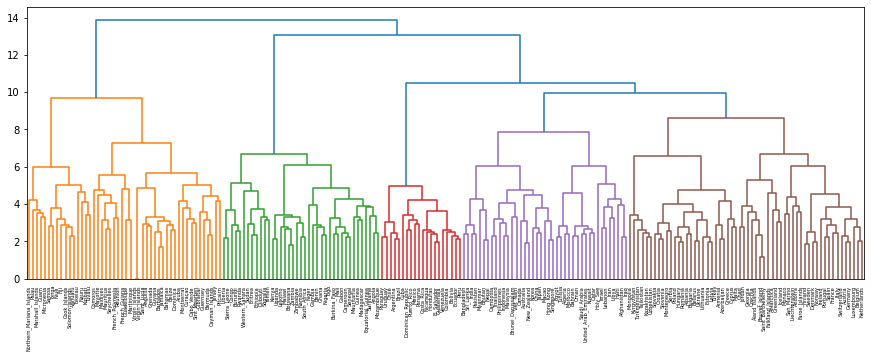

In [66]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(15, 5))
Z = linkage(countries_vec, method="ward")

dendrogram(Z, labels=countries_namelist_small)
plt.show()

## t-SNEによる可視化
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ

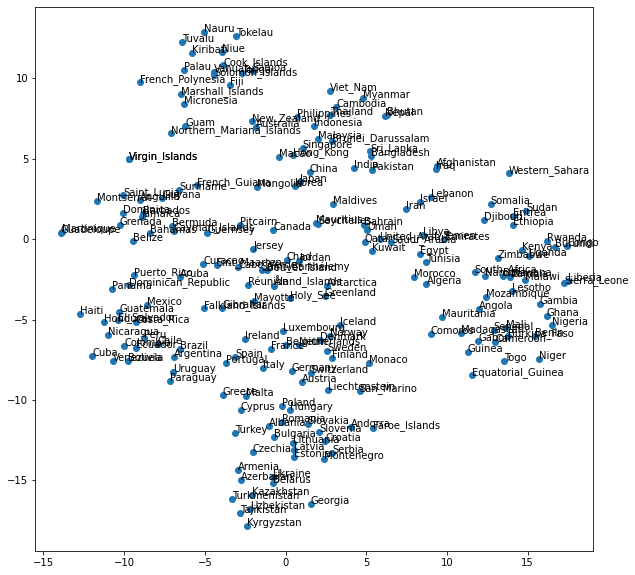

In [68]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state = 0, perplexity = 30, n_iter = 1000)
X_embedded = tsne.fit_transform(countries_vec)

plt.figure(figsize=(10, 10))
plt.scatter(np.array(X_embedded).T[0], np.array(X_embedded).T[1])
for (x, y), name in zip(X_embedded, countries_namelist_small):
    plt.annotate(name, (x, y))
plt.show()